In [1]:
import os
os.chdir('../src/')
from twitter_scraper import settings

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

users_df = pd.read_csv(settings.USERS_CSV)
nodes_df = pd.read_csv(settings.NODES_CSV)
tweets_df = pd.read_csv(settings.TWEETS_CSV, low_memory=False)
edges_df = pd.read_csv(settings.EDGES_FOLLOWERS_CSV)

In [23]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           596 non-null    int64 
 1   user_id_str       596 non-null    int64 
 2   name              596 non-null    object
 3   screen_name       596 non-null    object
 4   location          596 non-null    object
 5   description       498 non-null    object
 6   protected         596 non-null    bool  
 7   verified          596 non-null    bool  
 8   followers_count   596 non-null    int64 
 9   friends_count     596 non-null    int64 
 10  listed_count      596 non-null    int64 
 11  favourites_count  596 non-null    int64 
 12  statuses_count    596 non-null    int64 
 13  created_at        596 non-null    object
 14  is_croatian       596 non-null    bool  
 15  clean_location    596 non-null    object
dtypes: bool(3), int64(7), object(6)
memory usage: 62.4+ KB


In [24]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139428 entries, 0 to 139427
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         139428 non-null  int64  
 1   user_id                    139428 non-null  int64  
 2   user_id_str                139428 non-null  int64  
 3   full_text                  139428 non-null  object 
 4   created_at                 139428 non-null  object 
 5   hashtags                   139428 non-null  object 
 6   user_mentions              139428 non-null  object 
 7   retweet_user_str           139428 non-null  object 
 8   in_reply_to_status_id_str  72991 non-null   float64
 9   in_reply_to_user_id_str    73467 non-null   float64
 10  in_reply_to_screen_name    73467 non-null   object 
 11  geo                        315 non-null     object 
 12  coordinates                315 non-null     object 
 13  retweet_count              13

In [25]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           289 non-null    int64  
 1   user_id_str       289 non-null    int64  
 2   followers_count   289 non-null    int64  
 3   friends_count     289 non-null    int64  
 4   listed_count      289 non-null    int64  
 5   favourites_count  289 non-null    int64  
 6   statuses_count    289 non-null    int64  
 7   total_tweets      289 non-null    int64  
 8   covid_tweets      289 non-null    int64  
 9   covid_pct         289 non-null    float64
 10  is_covid          289 non-null    bool   
dtypes: bool(1), float64(1), int64(9)
memory usage: 23.0 KB


In [26]:
nodes_df.groupby('is_covid').size()

is_covid
False    102
True     187
dtype: int64

In [27]:
tweets_df.groupby('is_covid').size()

is_covid
False    133563
True       5865
dtype: int64

In [28]:
len(edges_df)

8315

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


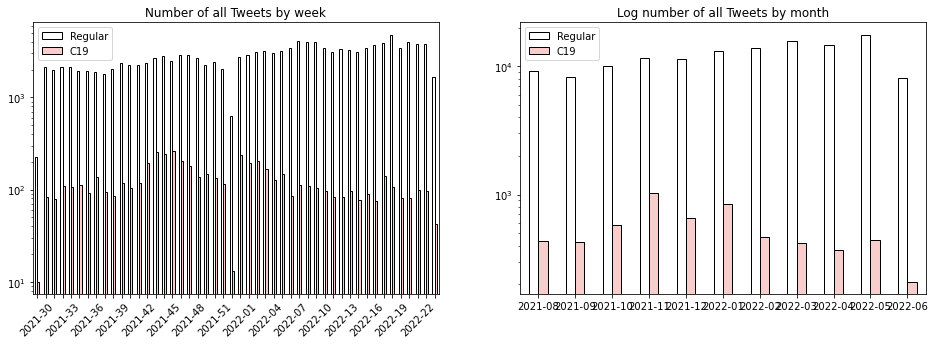

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
fig.set_facecolor('white')

tweets_df.groupby(['is_covid', 'week']).size().unstack('is_covid') \
    .plot.bar(
        title="Number of all Tweets by week", 
        rot=45,
        ax=ax[0],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[0].legend(['Regular', 'C19'])
ax[0].set_xlabel(None)
for i, t in enumerate(ax[0].get_xticklabels()):
    if (i % 3) != 0:
        t.set_visible(False)


tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        title="Log number of all Tweets by month", 
        rot=0,
        ax=ax[1],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[1].legend(['Regular', 'C19'])
ax[1].set_xlabel(None)

fig.savefig('tweets-by-month.eps', format='eps', dpi=320)
fig.savefig('tweets-by-month.png')

plt.show()


KeyError: 'week'

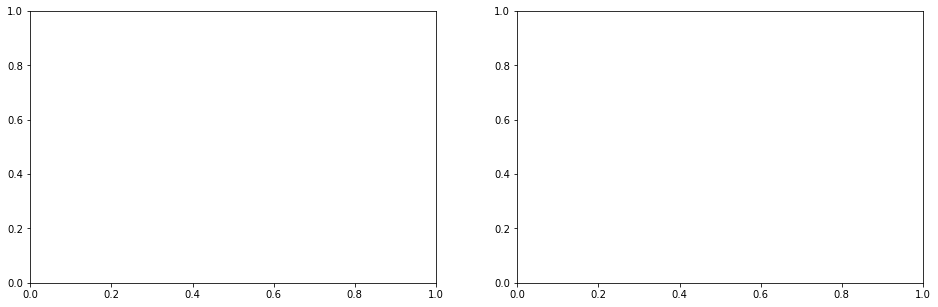

In [19]:


fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
fig.set_facecolor('white')

gdf = nodes_df.groupby(['is_covid', 'week']).size().unstack('week')
gdf[['is_covid']].plot(kind='bar', stacked=True)

plt1_df = tweets_df[tweets_df['is_covid'] == False].groupby(['is_covid', 'week']).size().reset_index(name='size')
ax[0].bar(tweets_df.index, plt1_df['size'], label='Non-Covid', log=True,
    title="Number of all Tweets by week", 
    rot=45,
    color=['#ffffff', '#f8cecc'],
    edgecolor='black'
)

ax[0].legend(['Regular', 'C19'])

ax[0].set_xlabel(None)
for i, t in enumerate(ax[0].get_xticklabels()):
    if (i % 3) != 0:
        t.set_visible(False)


tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        title="Log number of all Tweets by month", 
        rot=0,
        ax=ax[1],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[1].legend(['Regular', 'C19'])
ax[1].set_xlabel(None)

fig.savefig('tweets-by-month.eps', format='eps', dpi=320)
fig.savefig('tweets-by-month.png')

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


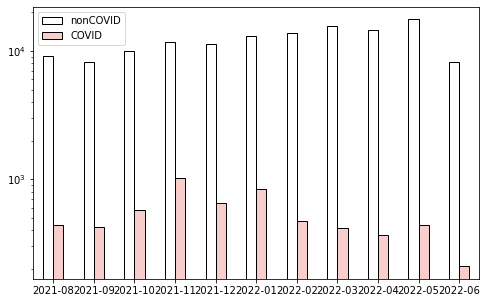

In [30]:
fig, ax = plt.subplots(1, figsize=(8, 5))
fig.set_facecolor('white')

tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        rot=0,
        ax=ax,
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax.legend(['nonCOVID', 'COVID'])
ax.set_xlabel(None)

fig.savefig('tweets-by-month.eps', dpi=320)
fig.savefig('tweets-by-month.png', dpi=320)

plt.show()

In [31]:
tweets_df.groupby(['week', 'is_covid']).size().unstack('is_covid')

is_covid,False,True
week,,
2021-30,224,10
2021-31,2114,84
2021-32,1991,79
2021-33,2146,109
2021-34,2109,107
2021-35,1944,113
2021-36,1939,91
2021-37,1886,136
2021-38,1810,93


In [37]:
tweets_df[tweets_df['is_covid'] == True]['full_text'].to_dict()

{159: 'radical-revolution:“There is a Tibetan saying: ‘When things are difficult, then let yourself be happy.’ Otherwise, if happiness is relying on others or the environment or your surroundings, it’s not possible. Like an ocean, the waves always go... https://t.co/LQ1u9znsM0',
 181: '📹 Jack Johnson - The 3 R’s (Unofficial Lyric Video) Good old song. They all talk about recycling, but this is the third step. First, we have to reduce our consumption. https://t.co/2CV9DUqmWb',
 355: 'Očito kasnim oko info o COVID-19.\nČitam da se pojavio novi oblik virusa-deltakron.',
 374: '@HamedBangoura Za koga je besplatno testiranje? Samo za ove koji rade u državnim službama?',
 378: '@capanigo @TelegramHR Raspad sistem je krenuo onog trena kad je Premijer slavodobitno rekao:"pobijedili smo COVID...!',
 380: 'RT @srdjl: Svakako da neću moći da zapamtim sve COVID pacijente koji su prošli kroz moju bolnicu ali jednog svakako neću zaboraviti. U pita…',
 393: '@Mathematicharka Besplatno testiranje u vr

In [42]:
b = 'radical-revolution:“There is a Tibetan saying: ‘When things are difficult, then let yourself be happy.’ Otherwise, if happiness is relying on others or the environment or your surroundings, it’s not possible. Like an ocean, the waves always go... https://t.co/LQ1u9znsM0'
a = '📹 Jack Johnson - The 3 R’s (Unofficial Lyric Video) Good old song. They all talk about recycling, but this is the third step. First, we have to reduce our consumption. https://t.co/2CV9DUqmWb'
any(tag in b for tag in settings.KEYWORDS['is_covid'])
for tag in settings.KEYWORDS['is_covid']:
    if tag in a:
        print(tag)